In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline

# Exploratory Data Analysis

In [2]:
#from sklearn.ensemble import RandomForestRegressor
Bank_data=pd.read_csv('bank-full.csv')
Bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


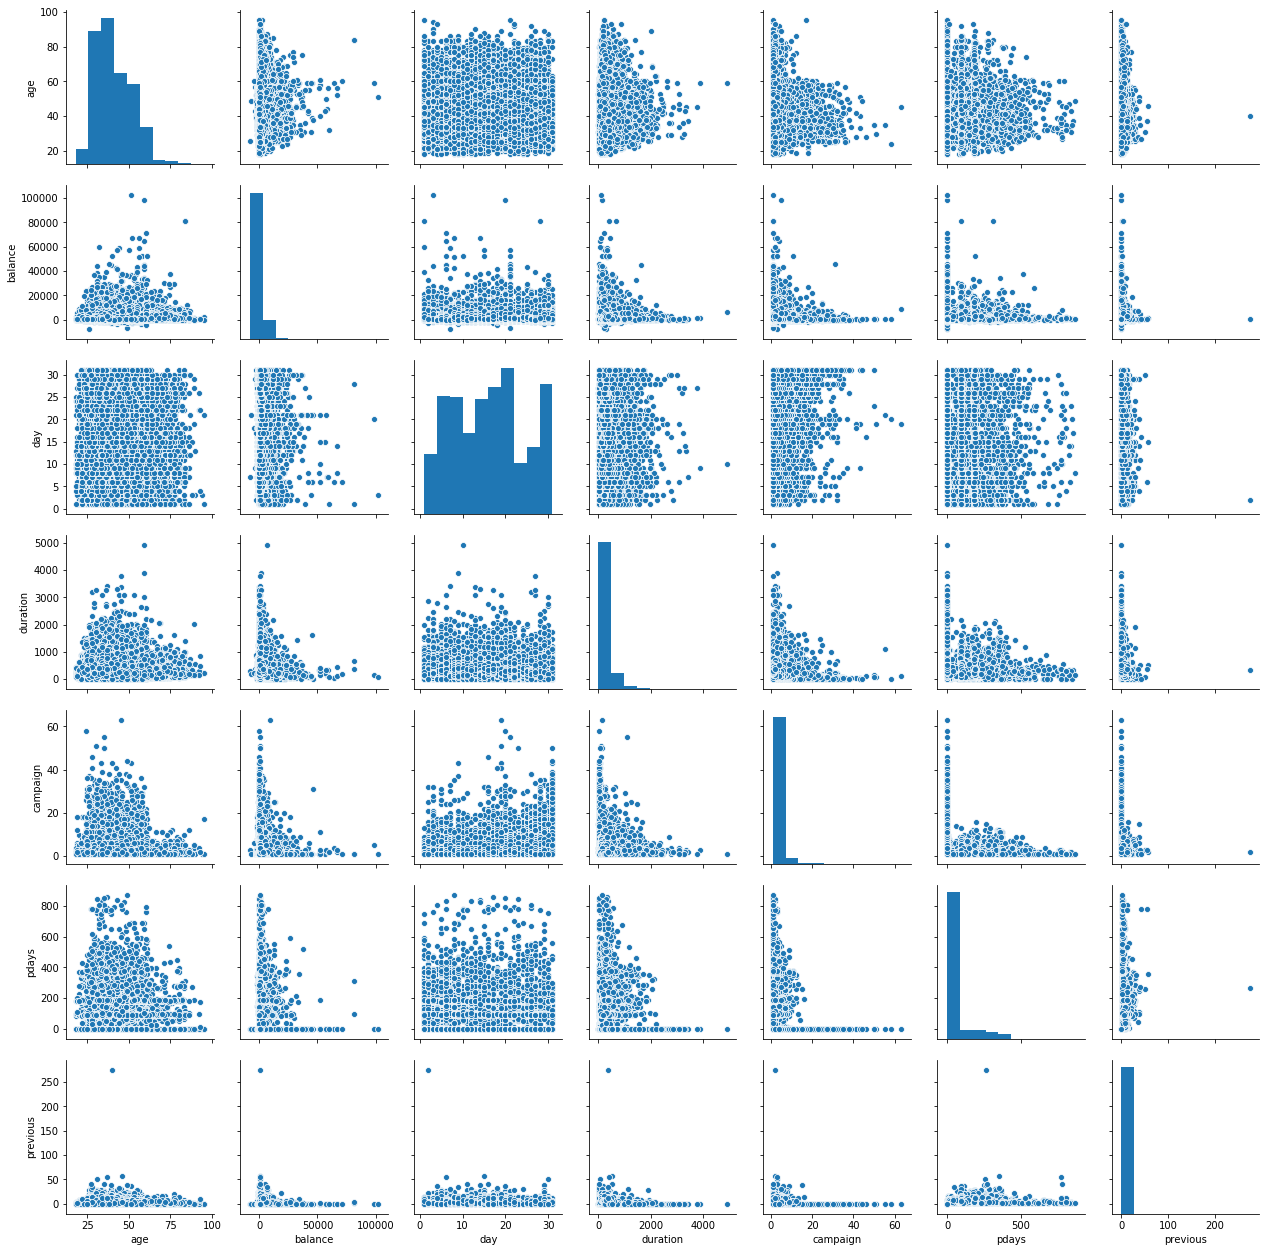

In [151]:
#Looking for correlation
g= sns.pairplot(Bank_data)
# Pronounced correlation between CAMPAIGN, BALANCE and DURATION
#Since duration is only taken for benchmarking, and can be measured only after a call is made, ignoring the variable for further analysis.

C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


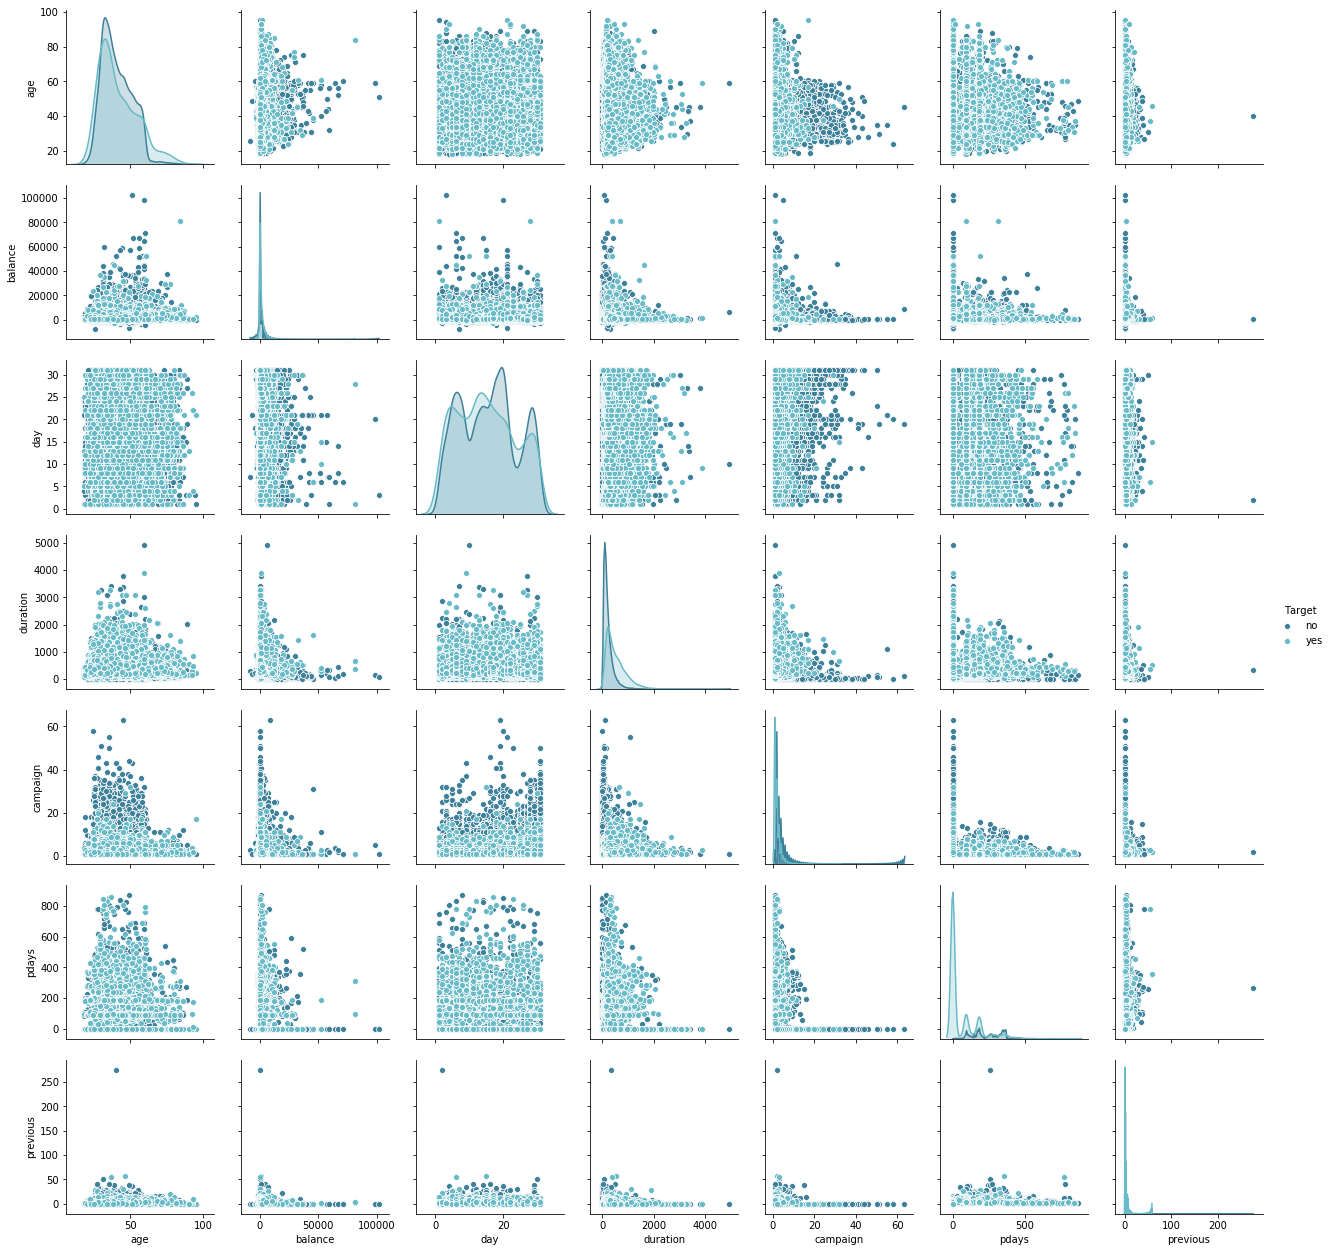

In [4]:
c = sns.pairplot(Bank_data, hue="Target", palette="GnBu_d")#"husl")#

In [3]:
#Checking for data outliers/skewness
Bank_data.describe()
#High skewness observed in "balance", "campaign", "previous" and "pdays"

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
#Checking for null values.
just=Bank_data.dropna()
just.count()
#There seem to be no null values

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
Target       45211
dtype: int64

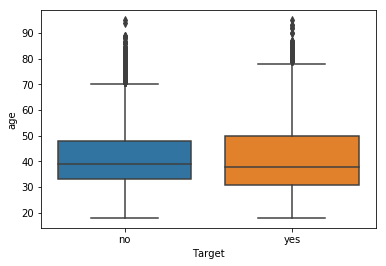

In [5]:
sns.boxplot(Bank_data["Target"],Bank_data["age"])
# Average age is similar for both product takers and non-takers, however spread is slightly wider for takers

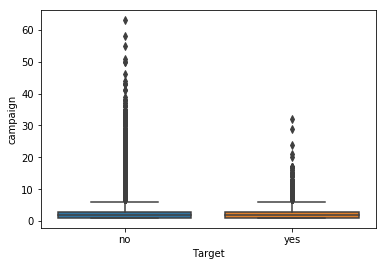

In [6]:
sns.boxplot(Bank_data["Target"],Bank_data["campaign"])
#Similar distribution between takers and non-takers, but spread is very wide for non-takers.

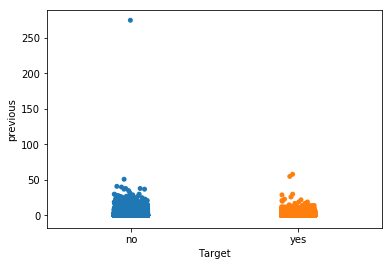

In [7]:
sns.stripplot(Bank_data["Target"],Bank_data["previous"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD459ADB00>,
      dtype=object)

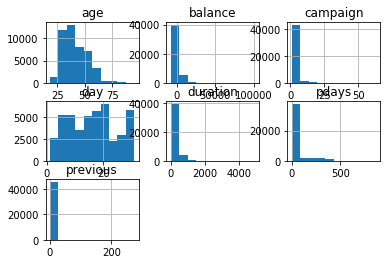

In [50]:
Bank_data.hist()
#Shape of distribution of numerical features: skewness found in all features except "age" and "previous"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD46B37898>,
      dtype=object)

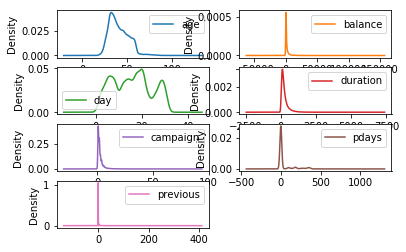

In [51]:
Bank_data.plot(kind='density', subplots=True, layout=(4,2), sharex=False)

age            AxesSubplot(0.125,0.536818;0.168478x0.343182)
balance     AxesSubplot(0.327174,0.536818;0.168478x0.343182)
day         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
duration    AxesSubplot(0.731522,0.536818;0.168478x0.343182)
campaign          AxesSubplot(0.125,0.125;0.168478x0.343182)
pdays          AxesSubplot(0.327174,0.125;0.168478x0.343182)
previous       AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

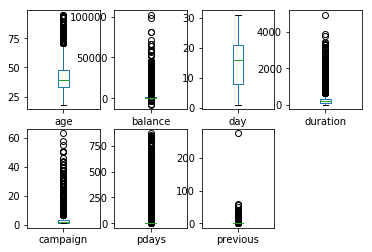

In [52]:
Bank_data.plot(kind='box', subplots=True, layout=(2,4))#, sharex=False, sharey=False) #layout=(3,3),

In [53]:
Bank_data.corr()
# plot correlation matrix
# Significant correlation between "previous", number of previous contacts 
#and "pdays", number of payd passed since previous contact

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


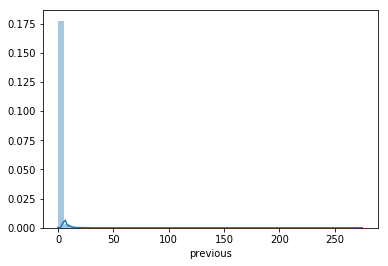

In [8]:
sns.distplot(Bank_data["previous"])
#Bank_data["previous"].sort_values(ascending=False)

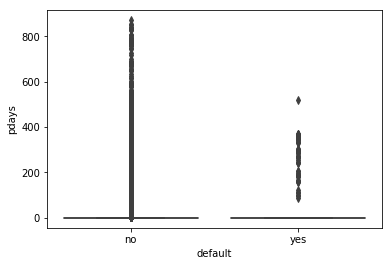

In [56]:
sns.boxplot(Bank_data["default"],Bank_data["pdays"])
#very extreme values in "previous" , apart from outliers. Similar case with "pdays"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000264F0DB2AC8>,
      dtype=object)

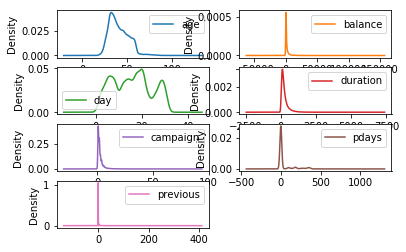

In [3]:
Bank_data.plot(kind='density', subplots=True, layout=(4,2), sharex=False)

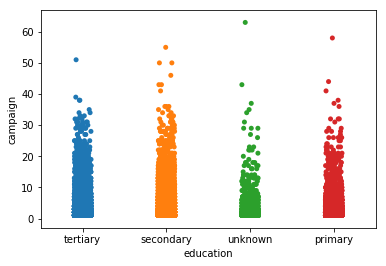

In [57]:
sns.stripplot(Bank_data["education"],Bank_data["campaign"])#, hue=Bank_data["job"]) Need to check swarm plot

In [9]:
Bank_num=Bank_data[['duration','balance','age','day','campaign','pdays','previous']]
Bank_num.head()
#Bank_num.count()

,duration,balance,age,day,campaign,pdays,previous
0,261,2143,58,5,1,-1,0
1,151,29,44,5,1,-1,0
2,76,2,33,5,1,-1,0
3,92,1506,47,5,1,-1,0
4,198,1,33,5,1,-1,0


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


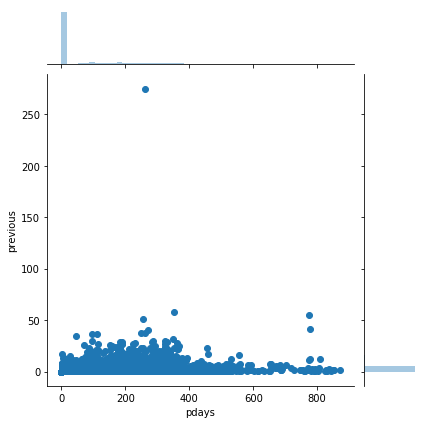

In [27]:
sns.jointplot(Bank_data["pdays"],Bank_data["previous"])

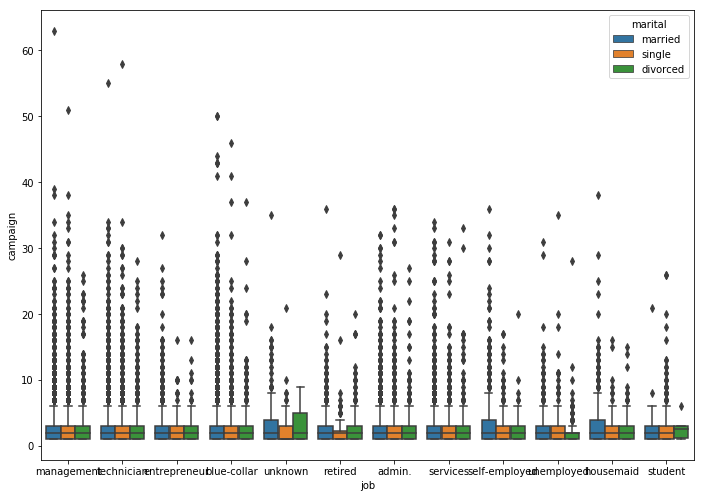

In [10]:
plt.gcf().set_size_inches(11.7, 8.27)
sns.boxplot( Bank_data["job"],Bank_data["campaign"],hue=Bank_data["marital"])
#sns.boxplot(Bank_data["marital"],Bank_data["campaign"])

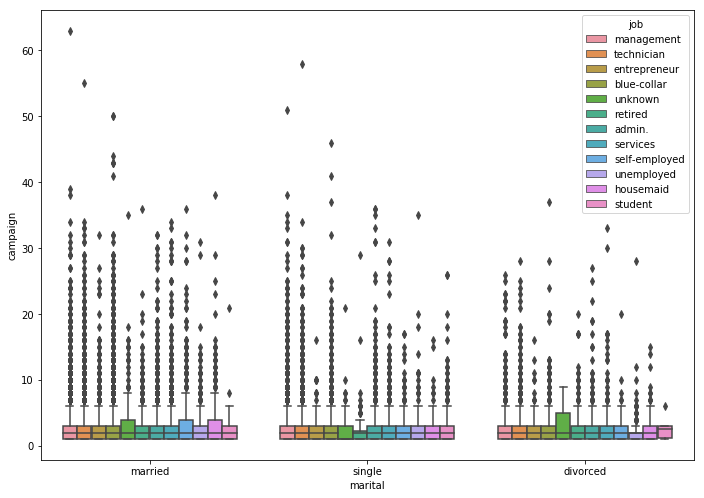

In [39]:
plt.gcf().set_size_inches(11.7, 8.27)
sns.boxplot(Bank_data["marital"],Bank_data["campaign"],hue=Bank_data["job"])
# behaviour within each job category across all marital statuses seems identical except for job category "unknown". 
#Nothing significant found

In [87]:
# Since duration is given only for benchmarking, discarding it
Bank_data_final=Bank_data.drop(['duration'], axis=1)
Bank_data_final.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


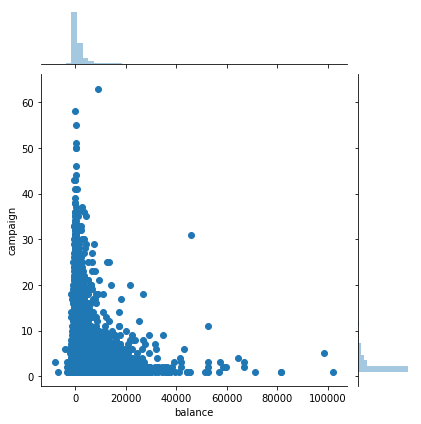

In [59]:
sns.jointplot(Bank_data_final["balance"],Bank_data_final["campaign"])
# As the balance in a person's account increases, less and less campaigning is targeted towards them

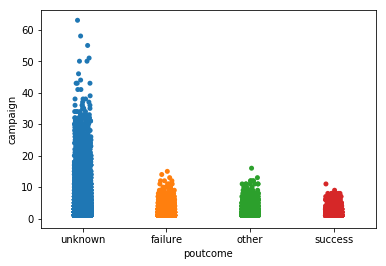

In [60]:
sns.stripplot(Bank_data_final["poutcome"], Bank_data_final["campaign"])
#No significant differences found between various known outcomes in the previous campaign. 
#However, they all significantly differ from the "unknown" outcome

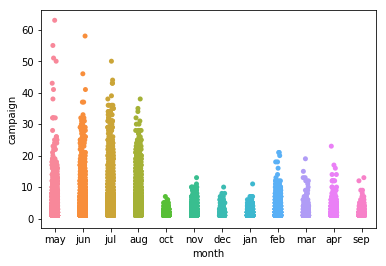

In [81]:
sns.stripplot(Bank_data_final["month"], Bank_data_final["campaign"])
#Too short for seasonality, but more spread in number of contacts from May to August

### Although almost all numerical variables are skewed (age, balance, duration, campaign, pdays, previous), since the ensemble models are all based on tree based models, scaling will not be necessary. This is because tree based models are less sensitive to outliers and data skewness. Hence skipping scaling process

# Non-Ensemble Models

### Using Logistic Regression based Classifier and Naive Bayes Classifier

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


enc = OneHotEncoder(handle_unknown='ignore')
lenc =LabelEncoder()

In [88]:
#Replacing yes/no with 1/0 in independent variables "default", "housing", "loan"
#Bank_data_final["default"]=Bank_data_final["default"].map(dict(yes=1, no=0))
#Bank_data_final["housing"]=Bank_data_final["housing"].map(dict(yes=1, no=0))
#Bank_data_final["month"]=Bank_data_final["month"].map(dict(jan=1,feb=2, mar=3,apr=4, may=5,jun=6,jul=7,aug=8,sep=9,oct=10,nov=11,dec=12))
Bank_data_final.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [89]:
x = Bank_data_final.drop(['Target'], axis=1)
#OEncoding other categorical variables
x["job"] = lenc.fit_transform(x["job"])
x["marital"] = lenc.fit_transform(x["marital"])
x["education"] = lenc.fit_transform(x["education"])
x["default"] = lenc.fit_transform(x["default"])
x["housing"] = lenc.fit_transform(x["housing"])
x["loan"] = lenc.fit_transform(x["loan"])
x["contact"] = lenc.fit_transform(x["contact"])
x["month"] = lenc.fit_transform(x["month"])
x["poutcome"] = lenc.fit_transform(x["poutcome"])
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,1,-1,0,3


In [91]:
Bank_data_final["Target"] = lenc.fit_transform(Bank_data_final["Target"])
y = Bank_data_final['Target']
#Replacing yes/no with 1/0
#y=y.map(dict(yes=1, no=0))
#y=y.eq('yes').mul(1)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [92]:
#Train-Test Splitting
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

# Logistic Regression Classifier Model

In [143]:
#Initialising Logistic Regression Classifier Model
LRC=LogisticRegression()

#Training LRC
LRC.fit(x_train,y_train)

# Testing classifier with the test data
predicted = LRC.predict(x_test)

#Confusion matrix
conf=confusion_matrix(y_test,predicted)
conf=confusion_matrix(y_test,predicted)
print ("Accuracy of Logistic Regression Classifier is ", accuracy_score(y_test,predicted)*100)
print ("Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives:", confusion_matrix(y_test,predicted))
print ("Sensitivity of the model is ", conf[1][1]/(conf[1][1]+conf[1][0]))
print ("Specificity of the model is ", conf[0][0]/(conf[0][0]+conf[0][1]))

Accuracy of Logistic Regression Classifier is  88.39246217818278
Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[9977   21]
 [1291   14]]
Sensitivity of the model is  0.010727969348659003
Specificity of the model is  0.9978995799159832


# Naive Bayes Classifier Model

In [144]:
#Initialising Naive Bayes Classisier Model
GNB=GaussianNB()

#Training LRC
GNB.fit(x_train,y_train)

# Testing classifier with the test data
predicted = GNB.predict(x_test)

#Confusion matrix
#conf=confusion_matrix(y_test,predicted)
conf=confusion_matrix(y_test,predicted)
print ("Accuracy of Naive Bayes Classifier is ", accuracy_score(y_test,predicted)*100)
print ("Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives:", confusion_matrix(y_test,predicted))
print ("Sensitivity of the model is ", conf[1][1]/(conf[1][1]+conf[1][0]))
print ("Specificity of the model is ", conf[0][0]/(conf[0][0]+conf[0][1]))

Accuracy of Naive Bayes Classifier is  80.76616827390957
Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[8700 1298]
 [ 876  429]]
Sensitivity of the model is  0.32873563218390806
Specificity of the model is  0.8701740348069614


# Ensemble Models

### For this assignment a comparison of Random Forest Classifier (Base Model) with AdaBoost Classifier, Gradient Boosting Classifier and Bagging Classifier will be made. 

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier # will be used as base model in all ensemble models

# Random Forest Classifier Model

In [145]:
for est in range(5):
    print("For number of estimators =", 15*(est+1))
    for dpt in range(5):
        print("For maximum depth of ",2*dpt+1, " levels" )
        #Initialising Random Forest Classisier Model
        RFC= RandomForestClassifier(n_estimators=20*(est+1), max_depth= 2*dpt+1, random_state=0)
        #Training LRC
        RFC.fit(x_train,y_train)
        # Testing classifier with the test data
        predicted = RFC.predict(x_test)
        #Confusion matrix
        conf=confusion_matrix(y_test,predicted)
        conf=confusion_matrix(y_test,predicted)
        print ("Accuracy of Random Forest Classifier is ", accuracy_score(y_test,predicted)*100)
        print ("Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives:", confusion_matrix(y_test,predicted))
        print ("Sensitivity of the model is ", conf[1][1]/(conf[1][1]+conf[1][0]))
        print ("Specificity of the model is ", conf[0][0]/(conf[0][0]+conf[0][1]))
       # print(" Feature Importance: " ,RFC.feature_importances_)
      #  %%timeit
        print ("---------------------------------------------------------------------------------------------------")
    print ("===================================================================================================")

For number of estimators = 15
For maximum depth of  1  levels
Accuracy of Random Forest Classifier is  88.45439263912236
Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[9998    0]
 [1305    0]]
Sensitivity of the model is  0.0
Specificity of the model is  1.0
---------------------------------------------------------------------------------------------------
For maximum depth of  3  levels
Accuracy of Random Forest Classifier is  88.463239847828
Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[9997    1]
 [1303    2]]
Sensitivity of the model is  0.0015325670498084292
Specificity of the model is  0.9998999799959992
---------------------------------------------------------------------------------------------------
For maximum depth of  5  levels
Accuracy of Random Forest Classifier is  88.85251703087675
Confusion Matrix in the order True Negatives, False Positives, False Negatives and

Accuracy of Random Forest Classifier is  88.45439263912236
Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[9998    0]
 [1305    0]]
Sensitivity of the model is  0.0
Specificity of the model is  1.0
---------------------------------------------------------------------------------------------------
For maximum depth of  3  levels
Accuracy of Random Forest Classifier is  88.463239847828
Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[9996    2]
 [1302    3]]
Sensitivity of the model is  0.0022988505747126436
Specificity of the model is  0.9997999599919984
---------------------------------------------------------------------------------------------------
For maximum depth of  5  levels
Accuracy of Random Forest Classifier is  88.93214190922764
Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[9968   30]
 [1221   84]]
Sensitivity of the

# Bagging Classifier Model

In [146]:
cart = DecisionTreeClassifier()
print("Base Model is a Decision Tree Classifier")
print ("======================================================================================================")
for est in range(7):
    print("For number of estimators = ",15*(est+1))
    #Initialising Bagging Classifier Model
    BGC = BaggingClassifier(base_estimator=cart, n_estimators=15*(est+1), random_state=1)
    #Training BGC
    BGC.fit(x_train,y_train)
    # Testing classifier with the test data
    predicted = BGC.predict(x_test)
    #Confusion matrix
    conf=confusion_matrix(y_test,predicted)
    conf=confusion_matrix(y_test,predicted)
    %%timeit
    print ("Accuracy of Bagging Classifier is ", accuracy_score(y_test,predicted)*100)
    print ("Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives:", confusion_matrix(y_test,predicted))
    print ("Sensitivity of the model is ", conf[1][1]/(conf[1][1]+conf[1][0]))
    print ("Specificity of the model is ", conf[0][0]/(conf[0][0]+conf[0][1]))
    print ("--------------------------------------------------------------------------------------------------")
    

Base Model is a Decision Tree Classifier
For number of estimators =  15
Accuracy of Bagging Classifier is  88.56940635229586
Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[9654  344]
 [ 948  357]]
Sensitivity of the model is  0.2735632183908046
Specificity of the model is  0.9655931186237248
--------------------------------------------------------------------------------------------------
For number of estimators =  30
Accuracy of Bagging Classifier is  89.08254445722375
Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[9739  259]
 [ 975  330]]
Sensitivity of the model is  0.25287356321839083
Specificity of the model is  0.9740948189637928
--------------------------------------------------------------------------------------------------
For number of estimators =  45
Accuracy of Bagging Classifier is  88.86136423958241
Confusion Matrix in the order True Negatives, False Positives, F

# Adaboost Classifier Model

In [147]:
for est in range(10):
    print("For number of estimators = ",15*(est+1))
    #Initialising Adaboost Classifier Model
    ADB=AdaBoostClassifier(n_estimators= 15*(est+1),random_state=1)
    #Training ADB
    ADB.fit(x_train,y_train)
    # Testing classifier with the test data
    predicted = ADB.predict(x_test)
    #Confusion matrix
    conf=confusion_matrix(y_test,predicted)
    conf=confusion_matrix(y_test,predicted)
    %%timeit
    print ("Accuracy of Adaboost Classifier is ", accuracy_score(y_test,predicted)*100)
    print ("Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives:", confusion_matrix(y_test,predicted))
    print ("Sensitivity of the model is ", conf[1][1]/(conf[1][1]+conf[1][0]))
    print ("Specificity of the model is ", conf[0][0]/(conf[0][0]+conf[0][1]))
    print ("--------------------------------------------------------------------------------------------------")
    

For number of estimators =  15
Accuracy of Adaboost Classifier is  88.60479518711847
Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[9859  139]
 [1149  156]]
Sensitivity of the model is  0.11954022988505747
Specificity of the model is  0.9860972194438887
--------------------------------------------------------------------------------------------------
For number of estimators =  30
Accuracy of Adaboost Classifier is  88.95868353534459
Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[9877  121]
 [1127  178]]
Sensitivity of the model is  0.1363984674329502
Specificity of the model is  0.9878975795159032
--------------------------------------------------------------------------------------------------
For number of estimators =  45
Accuracy of Adaboost Classifier is  89.07369724851809
Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[9

# Gradient Boosting Classifier Model

In [148]:
for est in range(10):
    print("For number of estimators = ",15*(est+1))
    #Initialising Gradient Boosting Classifier Model
    GBC=GradientBoostingClassifier(n_estimators= 15*(est+1),random_state=1)
    #Training GBC
    GBC.fit(x_train,y_train)
    # Testing classifier with the test data
    predicted = GBC.predict(x_test)
    #Confusion matrix
    conf=confusion_matrix(y_test,predicted)
    conf=confusion_matrix(y_test,predicted)
    %%timeit
    print ("Accuracy of Gradient Boosting Classifier is ", accuracy_score(y_test,predicted)*100)
    print ("Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives:", confusion_matrix(y_test,predicted))
    print ("Sensitivity of the model is ", conf[1][1]/(conf[1][1]+conf[1][0]))
    print ("Specificity of the model is ", conf[0][0]/(conf[0][0]+conf[0][1]))
    print ("--------------------------------------------------------------------------------------------------")
    

For number of estimators =  15
Accuracy of Gradient Boosting Classifier is  88.83482261346545
Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[9966   32]
 [1230   75]]
Sensitivity of the model is  0.05747126436781609
Specificity of the model is  0.9967993598719744
--------------------------------------------------------------------------------------------------
For number of estimators =  30
Accuracy of Gradient Boosting Classifier is  88.88790586569937
Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[9937   61]
 [1195  110]]
Sensitivity of the model is  0.0842911877394636
Specificity of the model is  0.9938987797559512
--------------------------------------------------------------------------------------------------
For number of estimators =  45
Accuracy of Gradient Boosting Classifier is  89.20640537910289
Confusion Matrix in the order True Negatives, False Positives, False Negati

# The best models in terms of Sensitivity are:

## Naive Bayes Classifier
###Accuracy of Naive Bayes Classifier is  80.76616827390957
###Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[8700 1298]
 [ 876  429]]
###Sensitivity of the model is  0.32873563218390806
###Specificity of the model is  0.8701740348069614

## Bagging Classifier
###Using Decision Tree Model
###For number of estimators =  15
###Accuracy is  88.56940635229586
##Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: 
[[9654  344]
 [ 948  357]]
###Sensitivity of the model is  0.2735632183908046
###Specificity of the model is  0.9655931186237248

# The best models by Overall Accuracy are:

# Gradient Boosting Classifier Model
###For number of estimators =  90
###Accuracy of Gradient Boosting Classifier is  89.34796071839335
###Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[9844  154]
 [1050  255]]
###Sensitivity of the model is  0.19540229885057472
###Specificity of the model is  0.9845969193838767

## AdaBoost Classifier Model
###For number of estimators =  135
###Accuracy of Adaboost Classifier is  89.25064142263116
###Confusion Matrix in the order True Negatives, False Positives, False Negatives and True Positives: [[9852  146]
 [1069  236]]
###Sensitivity of the model is  0.18084291187739462
###Specificity of the model is  0.9853970794158832

### Since the objective of this model is to check for whether a product will be subscribed to or not, we should not just concentrate on Sensitivity or Specificity. In fact they would not make much sense. In this case, we consider the overall accuracy, based on which, the Boosting Algorithms do a better job. Between Gradient Boosting and Adaboost Classifiers, Gradient Boosting seems to be doing a better job in terms of accuracy. Hence, I would recommend going ahead with Gradient Boosting Classifier with 90 estimators.